# Visualizing Clusters in 3D with Python's Matplotlib

## Introduction

Clustering with k-means algorithm has been developed to perform the task of grouping data. Below is an example of such analysis.
3D graphs using Scatter plot is one of the few applications where 3D graphs provide meaningful visualization.

## Import data 

In [1]:
import pandas as pd
df=pd.read_csv('./data/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Prepare data

In [2]:
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])  # filtering data containing types grass, fire, and water
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']  # created a series to mark columns to be dropped
df = df[types].drop(columns = drop_cols)  # dropped columns
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


## Cluster analysis using k means

calculate three clusters, get their centroids, and set some colors.

In [3]:
from sklearn.cluster import KMeans
import numpy as np

### k means

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

C:\Users\keset\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\keset\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### get centroids

In [5]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

### add to df

In [6]:
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

### define and map colors

In [7]:
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

### Scatter plot using matplotlib

Pass the fields we used to create the cluster to Matplotlib’s scatter and 
use the ‘c’ column we created to paint the points in our chart according to their cluster.

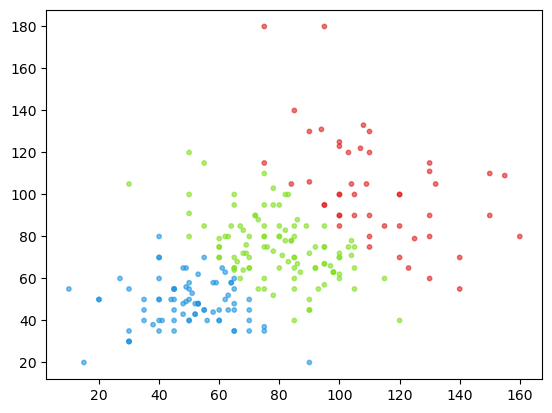

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)

This the basic visualization of a clustered dataset, and even without much information, 
we can already start to make sense of our clusters and how they are divided.

### Multiple Dimensions

We often use multiple variables to cluster our data and scatter plots can only display two variables. There are several options for visualizing more than three variables, but they all have disadvantages that should be considered.

We could use the markers’ size and make it a bubble chart, but that’s not an optimal solution. We couldn’t compare this third variable with the others since they would have different encodings.

For example, we can tell if a record has a higher Attack or Defense by looking at the chart we made earlier. But if we added Speed as the size, we couldn’t compare it with the other two variables.

#### Using bubble charts

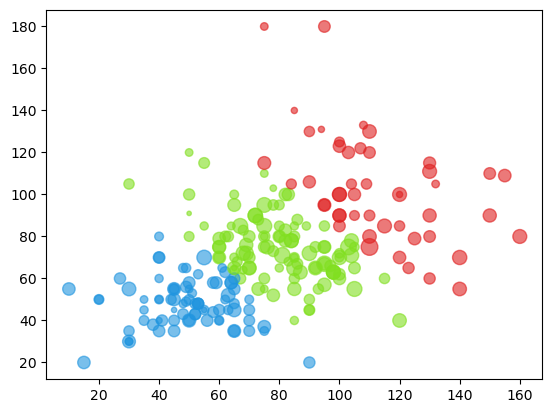

In [9]:
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha = 0.6)

#### Using 3D Scatter plots

3D plots can also encode a third variable, but it can also get confusing, sometimes even misleading — 
That’s because depending on how we look at the chart, it may give us the wrong impression.

Still, 3D scatter plots can be helpful, especially if they’re not static.

Depending on your environment, it’s easy to add some interactivity with Matplotlib.

Some IDEs will have this by default; other environments will require extensions and a magic command such as “Matplotlib Widget” on Jupyter Lab or “Matplotlib Notebook” on Jupyter notebooks.

By changing the angle we’re looking at the chart, we can examine it more carefully and avoid misinterpreting the data.

C:\Users\keset\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\keset\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


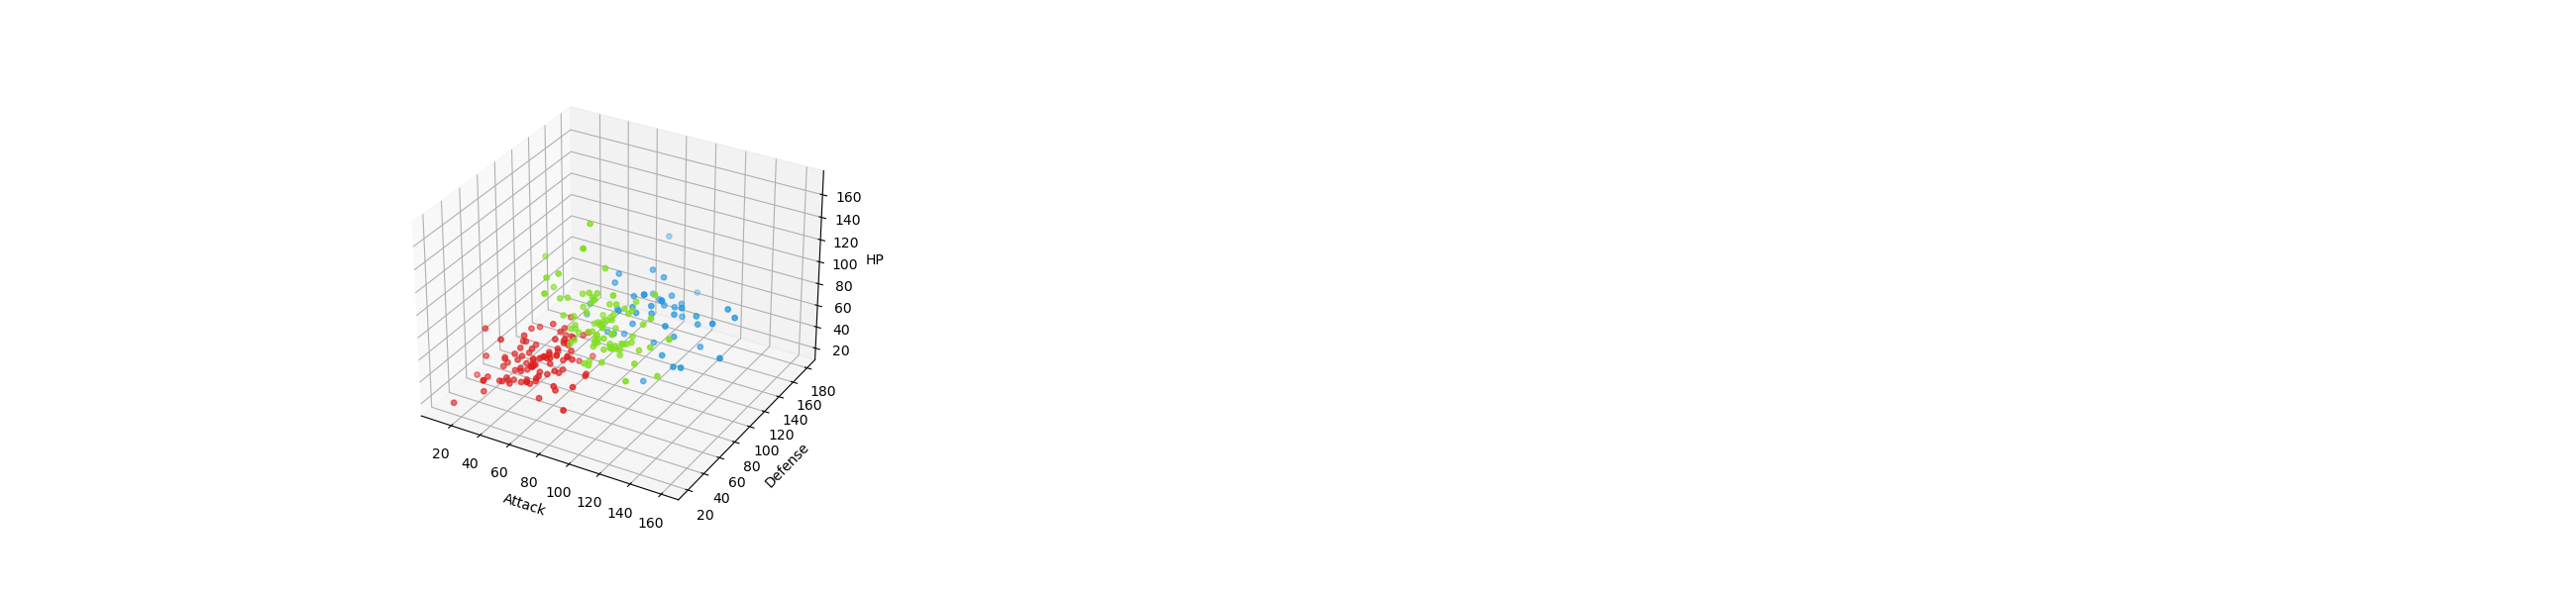

In [10]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

Overall, they still are a pretty limited solution.

I think the best approach is to use multiple scatter plots, either in a matrix format or by changing between variables. You can also consider using some data reduction method such as PCA to consolidate your variables into a smaller number of factors.

## Annotations

Now, let’s begin improving on our visualization.

If data visualization is storytelling, annotations are the equivalent of a narrator in our story. 
They should help the viewer understand and focus on what’s important while not taking too much space on the plot.

We’ll add the basics, a title, labels, and a legend.

### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
#### k means

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

C:\Users\keset\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\keset\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### get centroids

In [12]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

#### add to df

In [13]:
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

#### define and map colors

In [14]:
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#### PLOT

Text(0, 0.5, 'Defense')

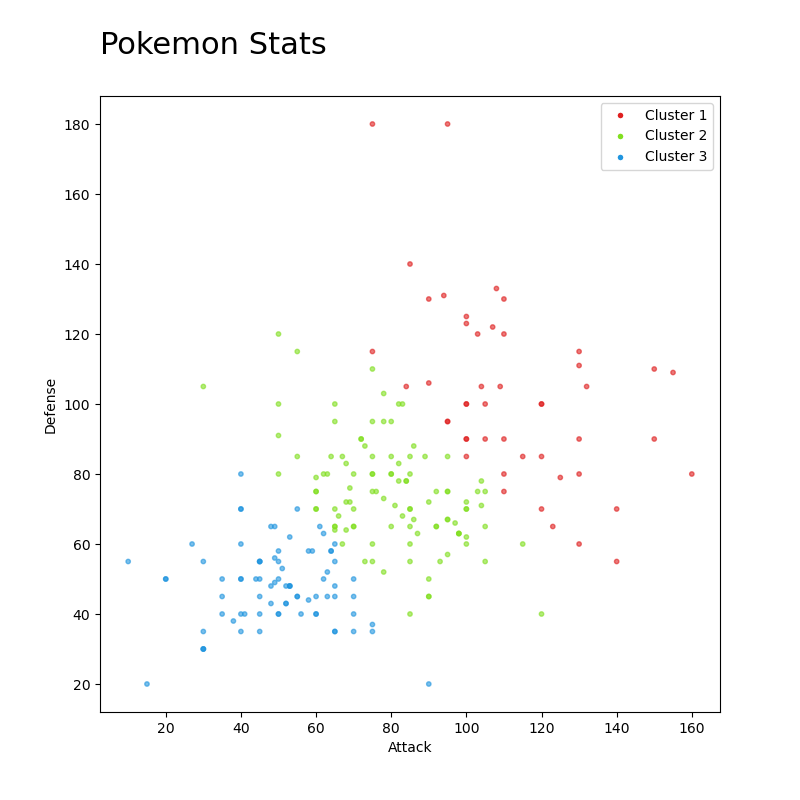

In [15]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

#### Add reference points

We can also give the viewer some reference points. 
Displaying the centroids and drawing reference lines to averages or a percentile can help explain our cluster.

Text(0, 0.5, 'Defense')

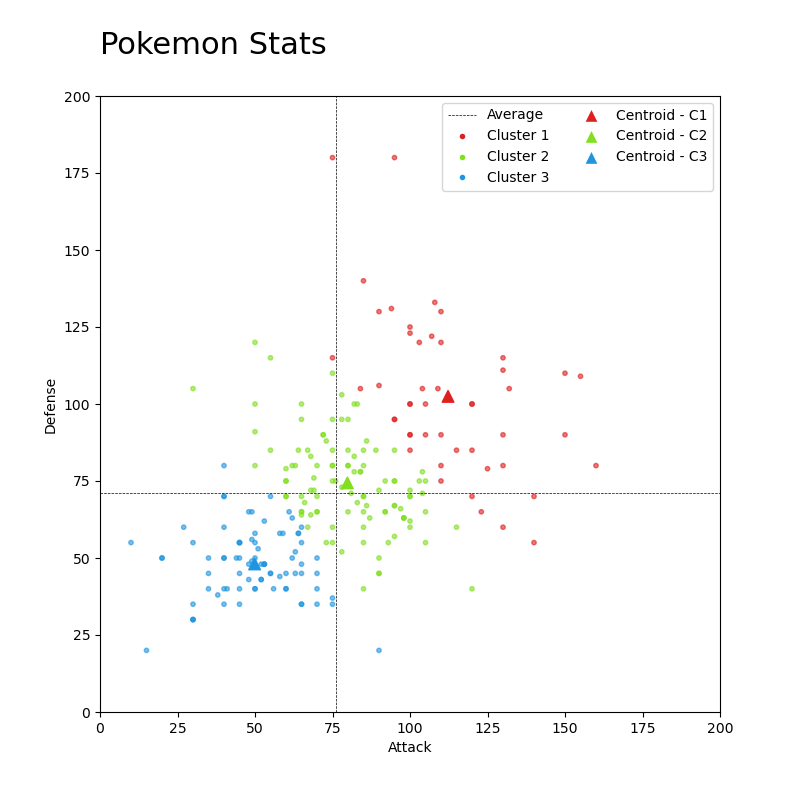

In [16]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([df.Attack.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)
# plot Defense mean
plt.plot([0,200], [df.Defense.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

It’s way easier to tell how the clusters are divided now.

The red cluster groups the highest attack and defence values, while the blue has the lowest, and 
the green group is generally closer to the average.

#### Lines
Illustrating how our cluster work can be as important as its results. In k-means, since we’re working with distances, connecting the points to their respective centroids can help us visualize what the algorithm is actually doing.

Text(0, 0.5, 'Defense')

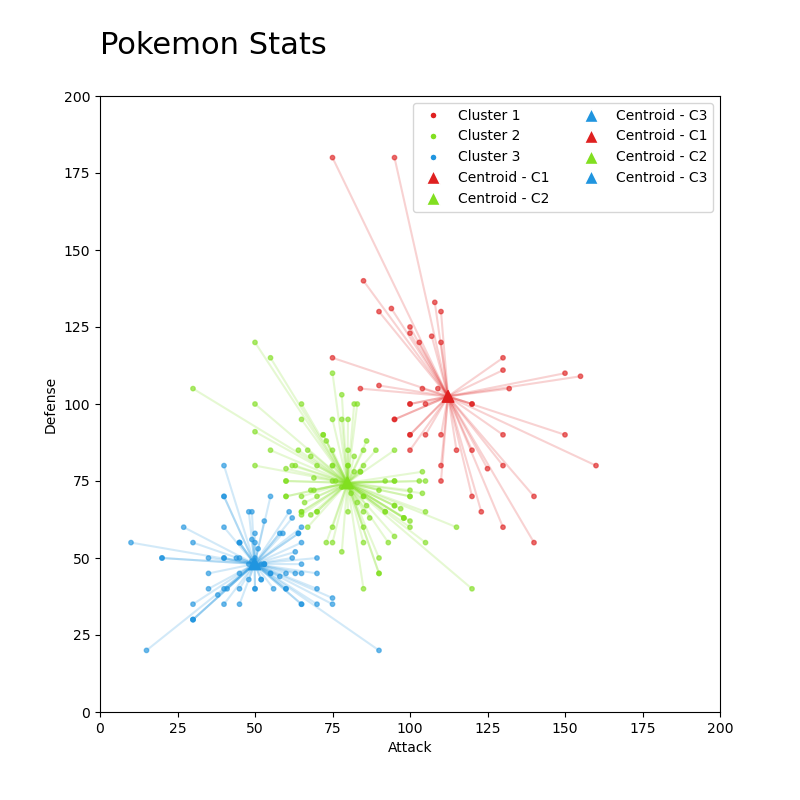

In [17]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Now the relationship between the clusters and the centroids is totally explicit, and it’s easier to explain how the algorithm works.

We can also see how spread out the values in each cluster are.

For example, the red values appear to be farther away from their centroid than blue values. If the groups’ variance is something important to our analysis, a chart like this could be effective.

We should also note that the separation between green and blue wasn’t so evident in the previous visualizations.

Even though they have different colors and are connected to different places, those records in the border between blue and green 
are still more similar between themselves than most values in their own cluster.

This visualization makes it harder to perceive that and may give the impression that values from distinct clusters are totally different.

#### Convex Hull
Another option to help us visualize our clusters’ size or spread is to draw a shape around it or a shadow. 
Doing so manually would take forever and for sure wouldn’t be worth the effort.

Luckily, there are ways to automate that.

The convex hull is the smallest set of connections between our data points to form a polygon that encloses all the points, 
and there are ways to find the convex hull systematically — That is to say, we can use Sklearn to get the contour of our dataset.

(0.0, 200.0)

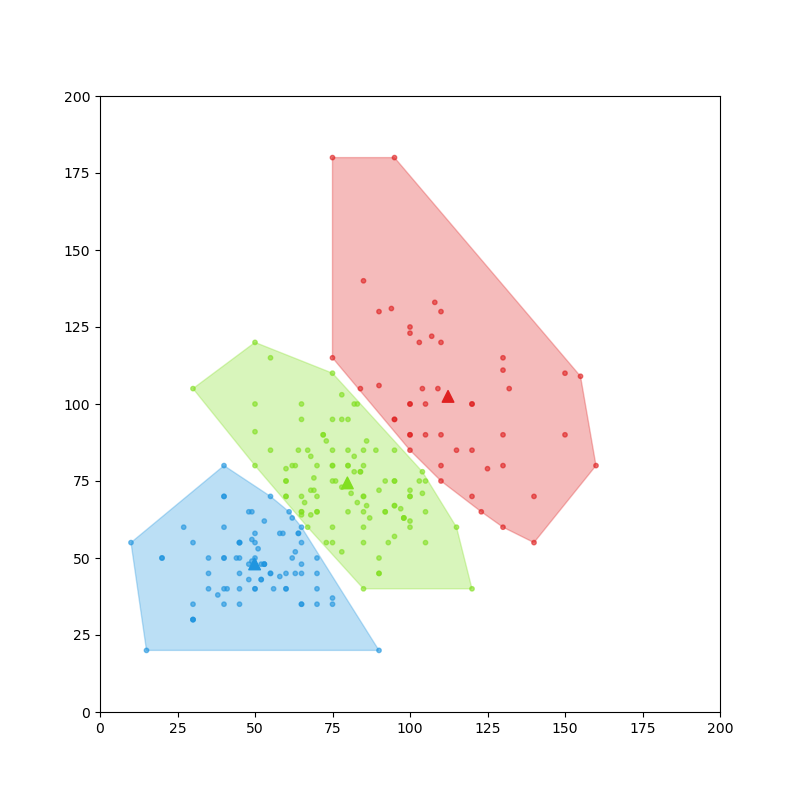

In [19]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

Great. We can even interpolate the lines of our polygon to make a smoother shape around our data.

(0.0, 200.0)

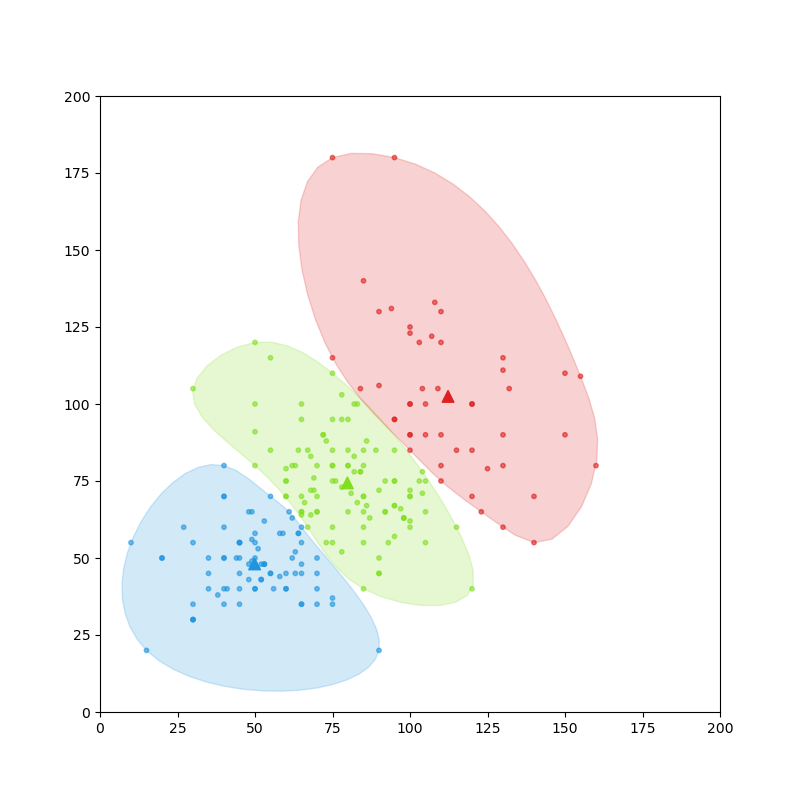

In [20]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0,200)
plt.ylim(0,200)

*The interpolation method was based on replies from this thread.

**I’ve added the argument per=1 to the splprep function as pointed out by Dragan Vidovic in the comments.

We shouldn’t take those contours so seriously since they are not an actual measurement. But they still do a great job highlighting the clusters so no viewer can miss them.

Overall, there’s no simple solution to visualize clusters. Each case is unique, and we should experiment a lot before deciding what to display to our public.

It’s also important to mention that the examples I used were clean. I used a simple dataset and only two variables for clustering. In real cases, it won’t always look like this. Often, drawing the connections to the centroid can make our chart too polluted and almost unreadable.

It would be best to start with something simple: visualize every combination of variables and identify the more meaningful ones or the ones where you can naturally demonstrate your insights. Then you can experiment with other visualizations and techniques for highlighting what you found.